# 지도학습

> 분류와 회귀

- 과대적합 & 과소적합 56p~ 읽어두기

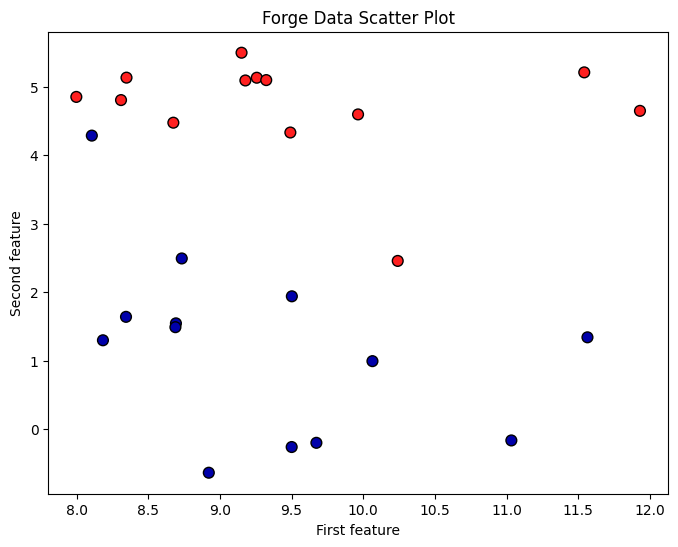

In [2]:
import matplotlib.pyplot as plt
import mglearn

# 데이터 생성
x, y = mglearn.datasets.make_forge()

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Forge Data Scatter Plot")
plt.show()

X.shape: (26, 2)


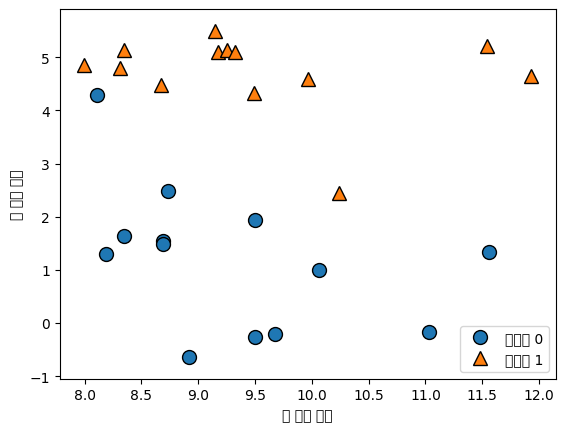

In [5]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)
plt.show() # 책에는 없음

In [7]:
import pandas as pd
import numpy as np

# 데이터 URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# 데이터를 읽어들임
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 데이터를 hstack을 사용하여 결합
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# 타겟 값 설정
target = raw_df.values[1::2, 2]

# 데이터 형태 출력
print("데이터의 형태:", data.shape)

데이터의 형태: (506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


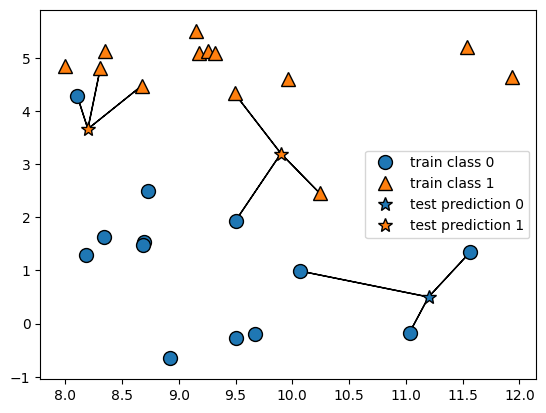

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


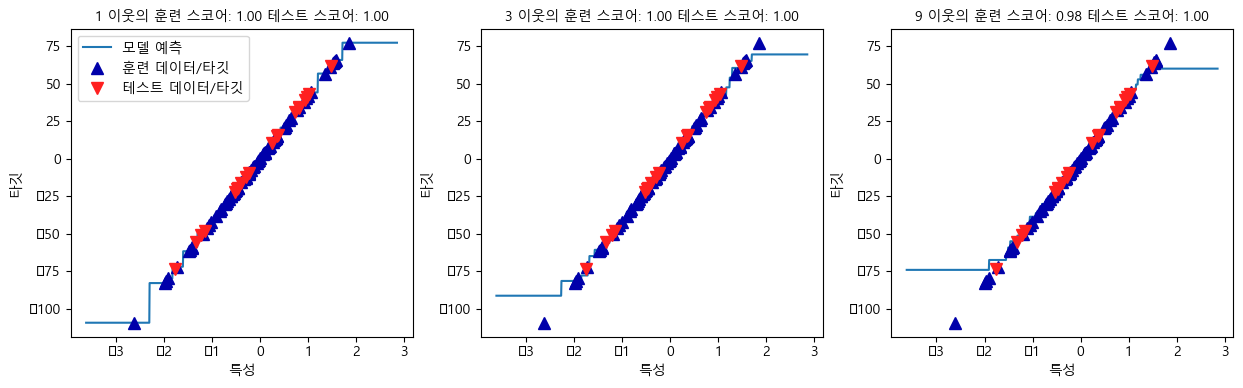

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import mglearn
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows의 경우
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

# 데이터셋 생성
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# X_train 데이터 범위를 기반으로 -3 과 3 사이의 데이터 포인트를 조정합니다
line = np.linspace(X_train.min() - 1, X_train.max() + 1, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)),
        fontproperties=fontprop)
    ax.set_xlabel("특성", fontproperties=fontprop)
    ax.set_ylabel("타깃", fontproperties=fontprop)

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best", prop=fontprop)
plt.show()
